In [184]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [185]:
# Import data
sectionData = pd.read_csv("./data/sections.csv")
segmentData = pd.read_csv("./data/segments.csv")

# Remove irrelevent columns
segmentColumnsToRemove = ['Unnamed: 0', 'track_number', 'total_tracks', 'loudness_end'] #'confidence', 'track_title', 'album_title', 'album_artist']
segmentData.drop(columns = segmentColumnsToRemove, axis = 1, inplace = True)

# Normalise data
segmentColumnsToNormalise = ['loudness_start', 'loudness_max']
segmentData[segmentColumnsToNormalise] = MinMaxScaler().fit_transform(segmentData[segmentColumnsToNormalise])

segmentData

# Weight variable importance according to hyperparameters?





,start,duration,confidence,loudness_start,loudness_max_time,loudness_max,track_title,album_title,album_artist,pitches,timbre,order
0,0.00000,1.01583,0.000,0.000000,0.00000,0.000000,Give Life Back to Music,Random Access Memories,Daft Punk,"[0.202, 0.246, 0.215, 0.198, 0.407, 1.0, 0.246...","[0.0, 171.13, 9.469, -28.48, 57.491, -50.067, ...",0.076923
1,1.01583,0.31596,1.000,0.000000,0.07260,0.807177,Give Life Back to Music,Random Access Memories,Daft Punk,"[0.169, 0.14, 0.057, 0.42, 1.0, 0.139, 0.033, ...","[35.458, 55.906, 69.742, -166.536, -3.252, 103...",0.076923
2,1.33179,0.20694,0.630,0.739549,0.00584,0.815274,Give Life Back to Music,Random Access Memories,Daft Punk,"[0.559, 0.518, 0.394, 0.09, 0.082, 0.069, 0.30...","[47.965, 57.123, -5.636, -1.102, -15.098, -44....",0.076923
3,1.53873,0.65542,0.721,0.765179,0.04780,0.858707,Give Life Back to Music,Random Access Memories,Daft Punk,"[0.156, 0.123, 0.097, 0.064, 0.292, 0.094, 0.0...","[49.72, 76.665, 1.289, -54.631, -18.938, 1.954...",0.076923
4,2.19415,0.13379,0.260,0.821622,0.05143,0.835847,Give Life Back to Music,Random Access Memories,Daft Punk,"[0.222, 0.188, 0.054, 0.109, 0.452, 0.159, 0.4...","[50.446, 81.393, 18.975, -21.829, -16.591, -18...",0.076923
...,...,...,...,...,...,...,...,...,...,...,...,...
34629,446.85956,0.20059,1.000,0.303725,0.05542,0.585634,"Episode 8, Paul Williams",Daft Punk | Random Access Memories | The Colla...,Daft Punk,"[0.377, 1.0, 0.55, 0.527, 0.407, 0.295, 0.557,...","[29.922, -110.172, -13.061, 10.591, 11.36, 48....",1.000000
34630,447.06015,0.13973,0.540,0.362194,0.03478,0.448896,"Episode 8, Paul Williams",Daft Punk | Random Access Memories | The Colla...,Daft Punk,"[0.665, 0.61, 0.481, 0.464, 0.84, 1.0, 0.25, 0...","[25.581, -94.848, 34.255, 8.047, -5.453, -18.7...",1.000000
34631,447.19986,0.10921,0.088,0.387182,0.01982,0.424926,"Episode 8, Paul Williams",Daft Punk | Random Access Memories | The Colla...,Daft Punk,"[0.481, 1.0, 0.477, 0.477, 0.381, 0.383, 0.202...","[21.545, 201.24, -134.528, 7.301, -12.098, -37...",1.000000
34632,447.30908,0.21193,1.000,0.209208,0.06644,0.548528,"Episode 8, Paul Williams",Daft Punk | Random Access Memories | The Colla...,Daft Punk,"[0.459, 0.923, 0.801, 0.512, 0.901, 1.0, 0.762...","[26.2, -55.72, 29.116, 52.232, 59.562, 77.648,...",1.000000


In [186]:
# Keys

# Keys 0-11 where 0 is Cmajor (Aminor)
#song1key = 4
#song2key = 11

# Circle of fifths
#if (song1key == song2key) or (song1key == (song2key + 5) % 12) or (song1key == (song2key + 7) % 12):
#    keyChange = 1


In [187]:
# Similarities at beginning and end of songs
# Loudness

# Tempo




In [188]:
# Timbre
timbreStr = segmentData['timbre']
numSegments = len(timbreStr)
timbre = pd.DataFrame(np.zeros((12, len(timbreStr))))

for x in range(len(timbreStr)):
    timbre[x] = pd.DataFrame(timbreStr[x].split(', '))
timbre = timbre.transpose()
timbre[0] = timbre[0].str[1:]
timbre[11] = timbre[11].str[:-1]

timbre


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,171.13,9.469,-28.48,57.491,-50.067,14.833,5.359,-27.228,0.973,-10.64,-7.228
1,35.458,55.906,69.742,-166.536,-3.252,103.341,49.364,-1.536,-24.884,69.886,22.117,-2.713
2,47.965,57.123,-5.636,-1.102,-15.098,-44.508,-12.726,4.581,-0.856,-4.22,-7.879,-0.509
3,49.72,76.665,1.289,-54.631,-18.938,1.954,4.342,14.679,-6.337,-6.765,-10.646,-6.253
4,50.446,81.393,18.975,-21.829,-16.591,-18.652,-0.103,12.926,0.496,6.445,-9.055,-0.43
...,...,...,...,...,...,...,...,...,...,...,...,...
34629,29.922,-110.172,-13.061,10.591,11.36,48.212,-3.297,14.733,-23.097,-16.652,-27.218,21.91
34630,25.581,-94.848,34.255,8.047,-5.453,-18.748,-4.959,46.092,-32.047,-32.444,6.704,9.038
34631,21.545,201.24,-134.528,7.301,-12.098,-37.86,-57.79,-3.728,52.823,-53.528,-19.152,-3.564
34632,26.2,-55.72,29.116,52.232,59.562,77.648,-1.26,43.144,-37.934,46.732,-41.657,-12.133


C:\Users\Mark\AppData\Local\Temp\ipykernel_12972\2901600907.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timbreSong.drop(columns = 12, axis = 1, inplace = True)


<AxesSubplot:>

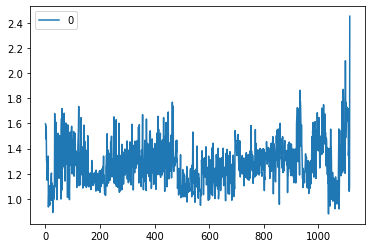

In [189]:
timbreSongs = segmentData['track_title'].astype('category')
timbreSongCodes = timbreSongs.cat.codes
timbre[12] = timbreSongCodes
timbreNum = timbre.astype('float64')
timbreSong = timbreNum.loc[timbreNum[12] == 1]
timbreSong.drop(columns = 12, axis = 1, inplace = True)

timbreSongNorm = pd.DataFrame(MinMaxScaler(feature_range=(-1,1)).fit_transform(timbreSong))

euclidianTimbre = pd.DataFrame(np.zeros((1, len(timbreSongNorm))))
for x in range(len(timbreSongNorm)):
    euclidianTimbre[x] = np.linalg.norm(timbreSongNorm.loc[x,:])

euclidianTimbre = euclidianTimbre.transpose()
euclidianTimbre.plot.line()



# Visualise 12D Timbre Vector over time
    # 12 superimposed line graphs

# Comparison of segments (using euclidian distance) to determine similarity
    # Find euclidian distance of each segment's timbreStr
    # Visualise

# Compare the "sounds" of two songs by clustering their segments' timbreStr vectors
    # Average the timbreStr of a song
    # Calculate the distance between the cluster centroids of the two tracks